In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Ethereum/RawTechnical_plus_Old.csv')

# Assuming 'Close' is the closing price column from which we will derive the target
# Create a binary target variable: 1 if the price increased, 0 otherwise
# df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Drop the last row as it now contains a NaN in the 'Target'
# df.dropna(subset=['Target'], inplace=True)

# Splitting the dataset into features and target
X = df.drop(['Price_Direction'], axis=1)
y = df['Price_Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.75390625


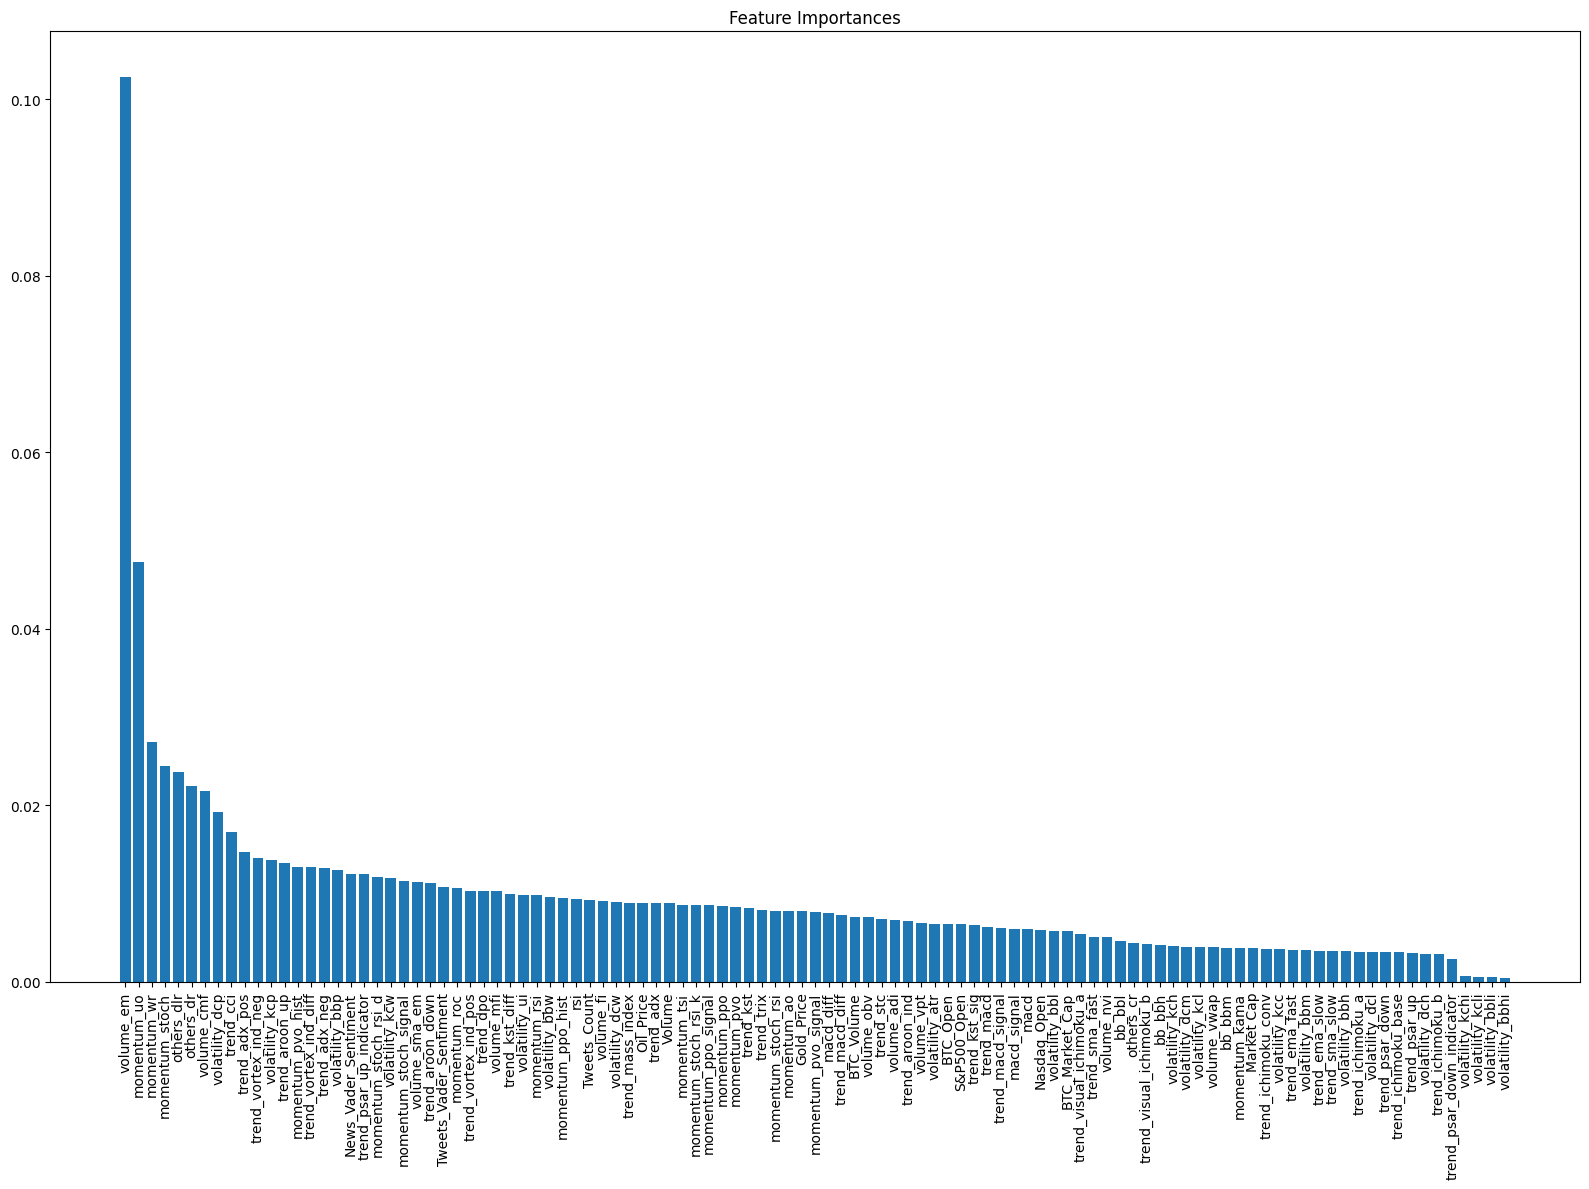

In [8]:
import matplotlib.pyplot as plt

# Get feature importances and sort them
importances = rf.feature_importances_
sorted_indices = importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(16, 12))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('../Experiment_sets/Ethereum/Ethereum_final_dataset.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)



In [5]:
df

,Open*,High,Low,Close**,Volume,Market Cap,volume_adi,volume_obv,volume_cmf,volume_fi,...,BTC_Volume_binary,BTC_Market_Cap_binary,Tweets_Count_binary,Tweets_Vader_Sentiment_binary,News_Vader_Sentiment_binary,Ethereum_Change_lag_1,Ethereum_Change_lag_2,Ethereum_Change_lag_3,Ethereum_Change_lag_4,Ethereum_Change_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,1201.5700,1202.0300,1187.4600,1199.2300,4.055668e+09,1.467547e+11,9.030692e+08,7.074182e+09,0.127657,9.976944e+09,...,0,0,0,1,0,0.0,1.0,0.0,0.0,1.0
2022-12-30,1190.0100,1204.1400,1188.3600,1201.6000,4.132234e+09,1.470439e+11,3.705028e+09,1.120642e+10,0.330617,9.950723e+09,...,1,0,0,0,1,1.0,0.0,0.0,1.0,0.0
2022-12-29,1212.7400,1213.1300,1185.7000,1189.9900,4.991670e+09,1.456232e+11,2.747333e+08,6.214746e+09,0.016961,2.501501e+08,...,0,1,0,1,1,0.0,0.0,1.0,0.0,1.0
2022-12-28,1226.9900,1230.4200,1205.9000,1212.7900,4.091531e+09,1.484140e+11,-1.517397e+09,1.030628e+10,-0.074787,1.354111e+10,...,1,0,1,0,0,0.0,1.0,0.0,1.0,1.0
2022-12-27,1218.9200,1226.9700,1214.3400,1226.9700,3.282098e+09,1.501496e+11,1.764701e+09,1.358838e+10,0.074865,1.825526e+10,...,1,0,1,1,0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-10,0.9855,0.9923,0.9736,0.9868,2.262810e+05,7.512831e+07,2.460530e+12,-1.372918e+12,0.127497,-1.704184e+05,...,1,1,1,0,0,1.0,1.0,0.0,1.0,0.0
2016-01-09,0.9428,0.9918,0.9397,0.9868,5.456000e+05,7.509981e+07,2.460531e+12,-1.372918e+12,0.133026,-1.460729e+05,...,0,0,0,1,0,1.0,0.0,1.0,0.0,0.0
2016-01-08,0.9558,0.9746,0.9358,0.9420,6.474620e+05,7.166715e+07,2.460530e+12,-1.372918e+12,0.138765,-1.293491e+05,...,0,0,0,1,0,0.0,1.0,0.0,0.0,1.0


In [2]:
# Splitting the dataset into features and target
X = df.drop(['Ethereum_Change'], axis=1)
y = df['Ethereum_Change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.9902152641878669


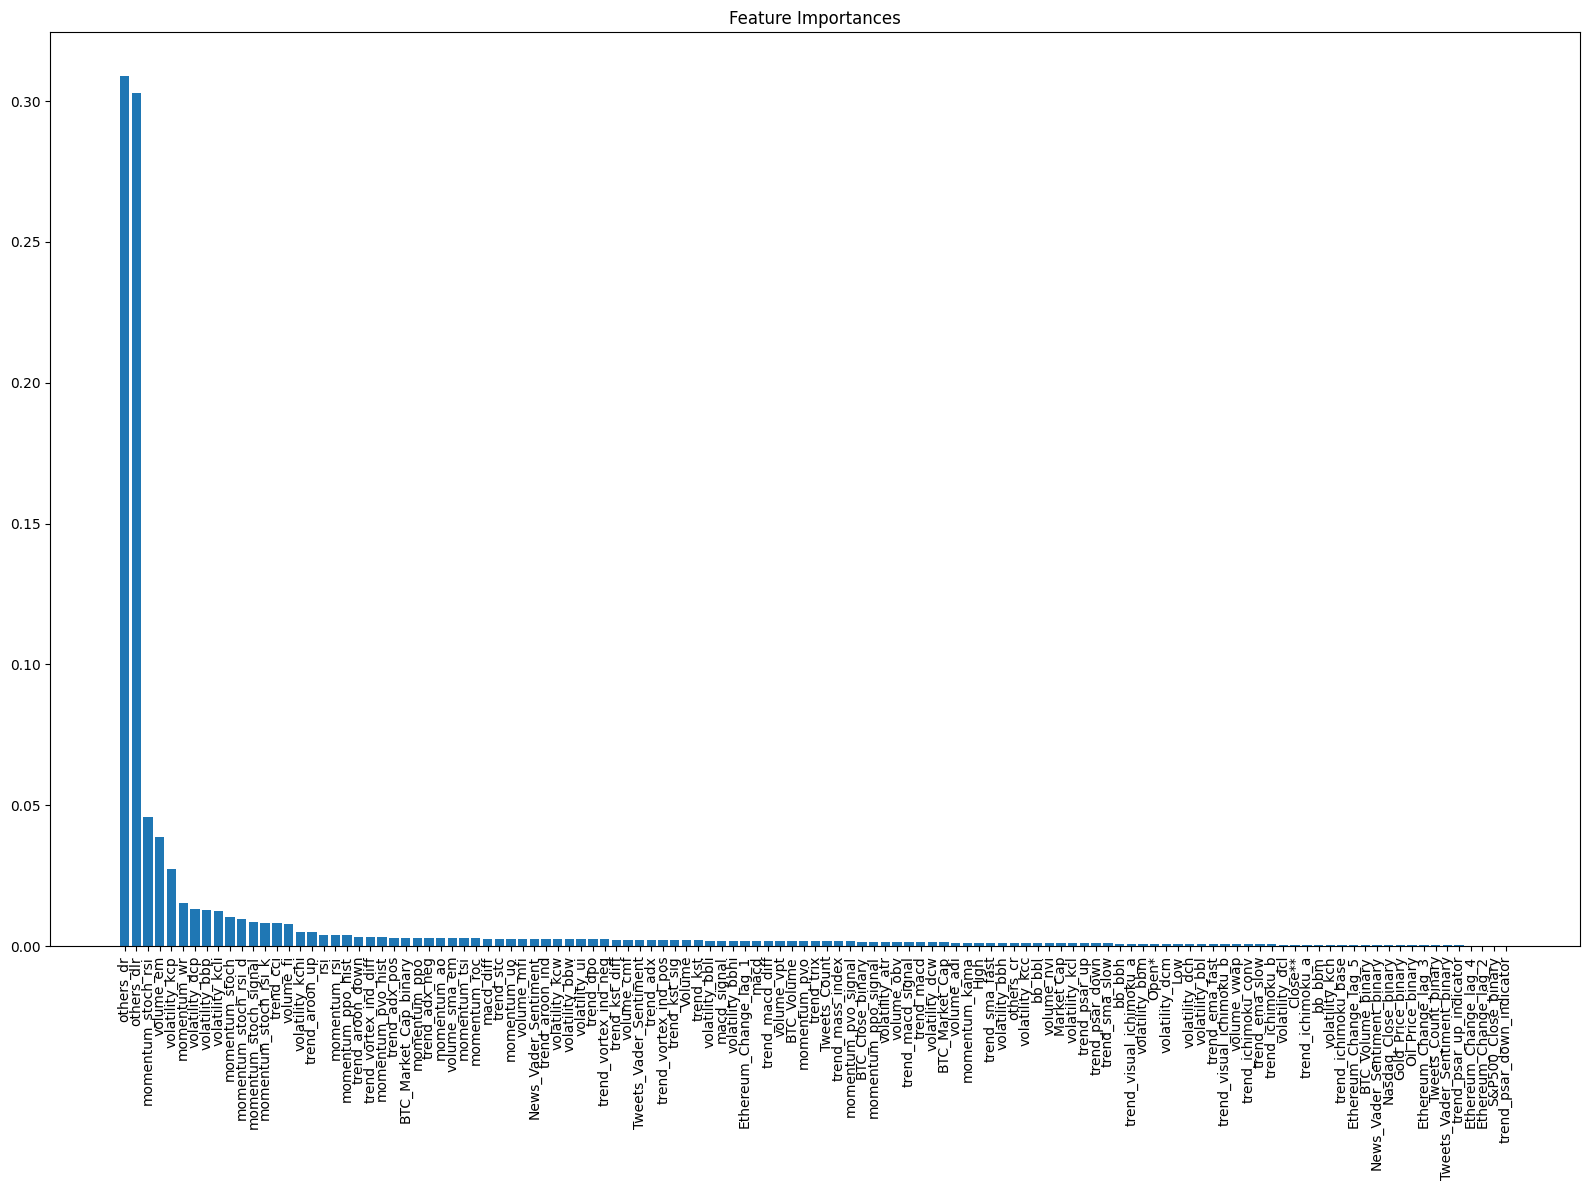

In [9]:
import matplotlib.pyplot as plt

# Get feature importances and sort them
importances = rf.feature_importances_
sorted_indices = importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(16, 12))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1027, number of negative: 1013
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24347
[LightGBM] [Info] Number of data points in the train set: 2040, number of used features: 119
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503431 -> initscore=0.013726
[LightGBM] [Info] Start training from score 0.013726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


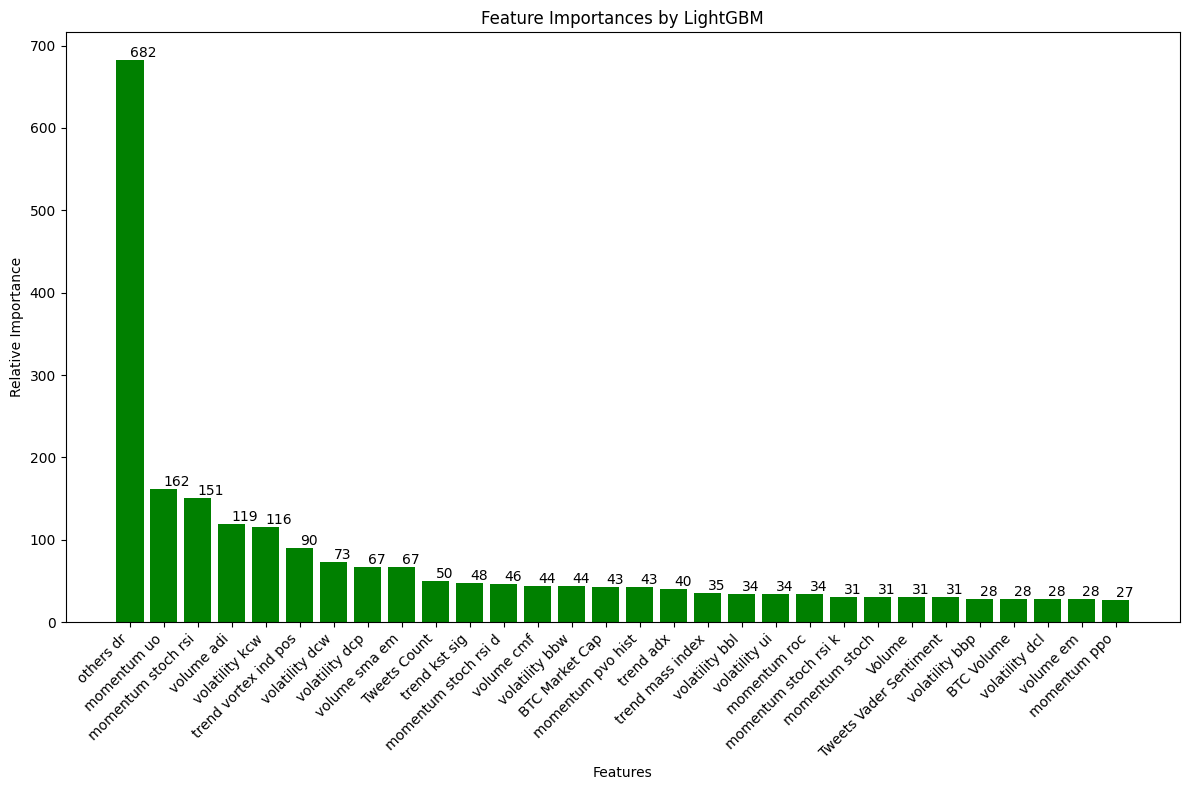

In [21]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

# Train the model
gbm = lgb.LGBMClassifier(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

# Get feature importances
gbm_importances = gbm.feature_importances_
indices = np.argsort(gbm_importances)[::-1]

# Define the number of top features to display
top_n = 30  # Show top 30 features for better clarity

plt.figure(figsize=(12, 8))  # Increase figure size for better clarity
plt.title('Feature Importances by LightGBM')
bars = plt.bar(range(top_n), gbm_importances[indices[:top_n]], color='green', align='center')

# Improve readability of the x labels
plt.xticks(range(top_n), [X_train.columns[i].replace('_', ' ') for i in indices[:top_n]], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.tight_layout()  # Adjust layout to make room for label rotation

# Optional: Annotate the bars with their values for better visibility
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.show()

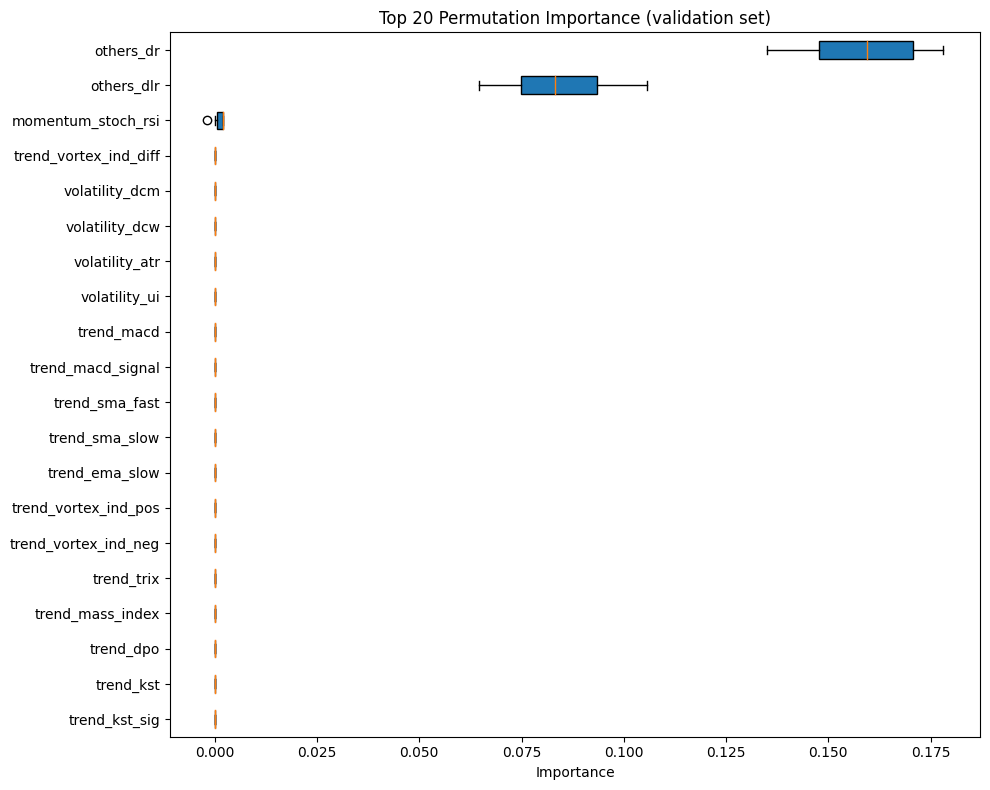

In [23]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

top_n = 20  # Number of top features to show
sorted_idx = result.importances_mean.argsort()[-top_n:]

plt.figure(figsize=(10, 8))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx], patch_artist=True)
plt.title("Top 20 Permutation Importance (validation set)")
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

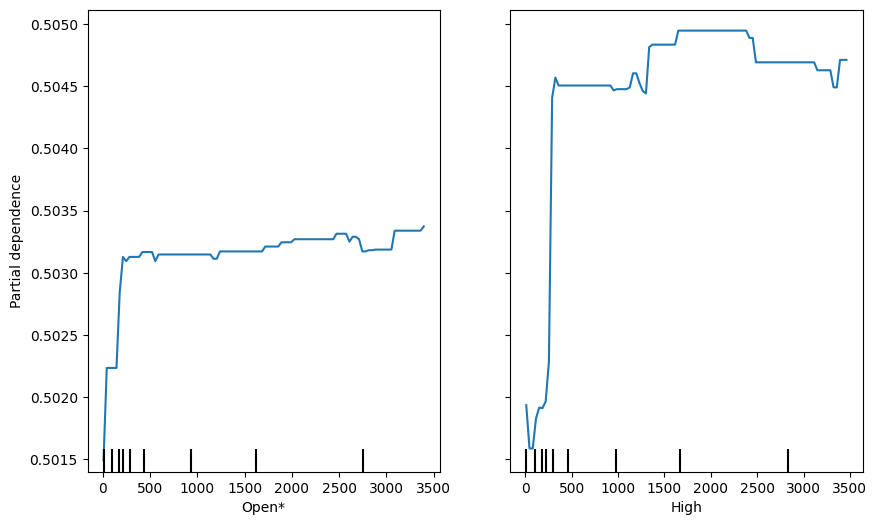

In [20]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf, X_train, features=[0, 1], ax=ax, feature_names=X_train.columns)
plt.show()

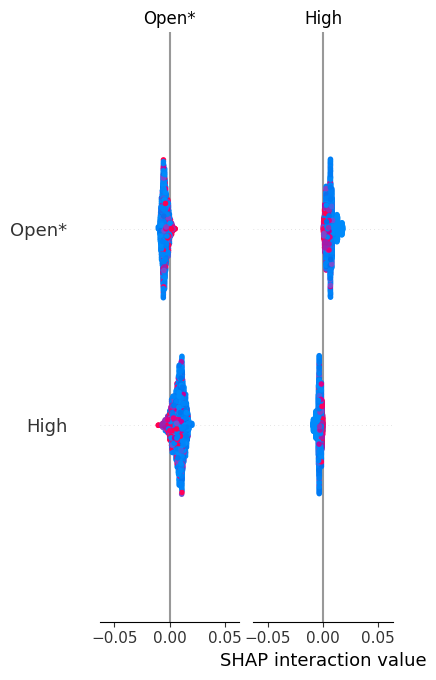

In [11]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Plot summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming `X_train` and `y_train` are your features and target arrays
# Feature Selection using Random Forest
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

# Select features based on importance
model = SelectFromModel(forest, prefit=True, threshold='mean')  # Adjust threshold as needed
X_reduced = model.transform(X_train)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Now X_pca can be used for further modeling
print("Reduced number of features after selection and PCA:", X_pca.shape[1])


Reduced number of features after selection and PCA: 5


C:\Users\sdas1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [4]:
X_pca

array([[ 0.78859923, -1.78906381,  0.5879275 ,  0.11161549, -0.43737418],
       [-3.86158738,  0.11979687,  0.24385829,  0.46944036,  0.46299494],
       [-3.82797141, -1.08447478,  0.59044275,  0.54585336,  0.26646827],
       ...,
       [-0.30698563, -0.39510686, -0.0063972 ,  0.72471708, -1.09680684],
       [-3.59575095,  0.62597732,  0.00731931,  0.65461874,  0.52019553],
       [-1.53890492,  0.25068574, -0.07030518, -0.02961878, -1.24337144]])